In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import time

train_dir = r'C:\Users\MANAN\OneDrive\Desktop\tomato\train'
val_dir = r'C:\Users\MANAN\OneDrive\Desktop\tomato\val'
test_dir = r'C:\Users\MANAN\OneDrive\Desktop\tomato\test'
img_width, img_height = 128, 128
batch_size=64
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 9000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [4]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top (fully connected) layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Assuming there are 10 classes
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16814666 (64.14 MB)
Trainable params: 2099978 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [5]:
train_steps_per_epoch = train_generator.samples // batch_size
val_steps_per_epoch = val_generator.samples // batch_size

# Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_steps_per_epoch
)

Epoch 1/10


140/140 [==============================] - 1704s 12s/step - loss: 1.3656 - accuracy: 0.5398 - val_loss: 0.8365 - val_accuracy: 0.7208
Epoch 2/10
140/140 [==============================] - 1492s 11s/step - loss: 0.9040 - accuracy: 0.6935 - val_loss: 0.6604 - val_accuracy: 0.7563
Epoch 3/10
140/140 [==============================] - 1673s 12s/step - loss: 0.7688 - accuracy: 0.7387 - val_loss: 0.5893 - val_accuracy: 0.7969
Epoch 4/10
140/140 [==============================] - 1582s 11s/step - loss: 0.7289 - accuracy: 0.7532 - val_loss: 0.6019 - val_accuracy: 0.7792
Epoch 5/10
140/140 [==============================] - 1527s 11s/step - loss: 0.6780 - accuracy: 0.7723 - val_loss: 0.5929 - val_accuracy: 0.7771
Epoch 6/10
140/140 [==============================] - 1308s 9s/step - loss: 0.6540 - accuracy: 0.7726 - val_loss: 0.5696 - val_accuracy: 0.7948
Epoch 7/10
140/140 [==============================] - 1518s 11s/step - loss: 0.6292 - accuracy: 0.7801 - val_loss: 0.5552 - val_a

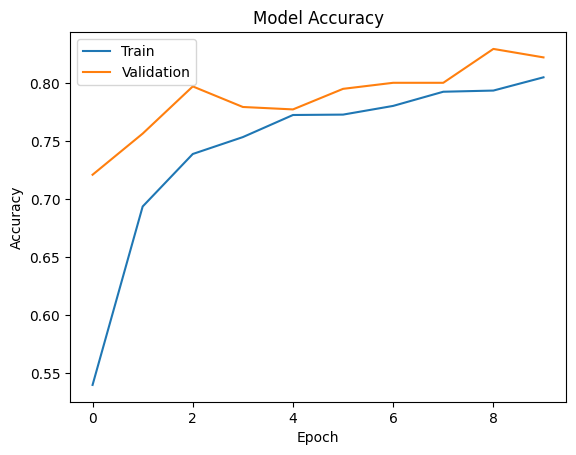

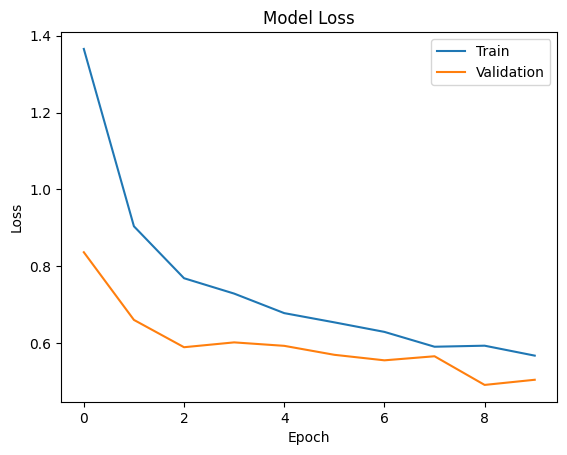

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

15/15 [==============================] - 170s 11s/step - loss: 0.4301 - accuracy: 0.8656
Test Accuracy: 86.56%
Test Loss: 0.4301


In [8]:
model.save('tomato2.h5')

C:\Users\MANAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
